# Comcast Telecom Consumer Complaints .

## DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

## Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
## Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df =pd.read_csv('comcast_telecom_complaints_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
name=df.columns.values
name

array(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'], dtype=object)

In [7]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,04-Feb-15 9:13:18 AM
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,06-Feb-15 1:24:39 PM
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,06-Sep-15 5:28:41 PM
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23-Jun-15 11:13:30 PM


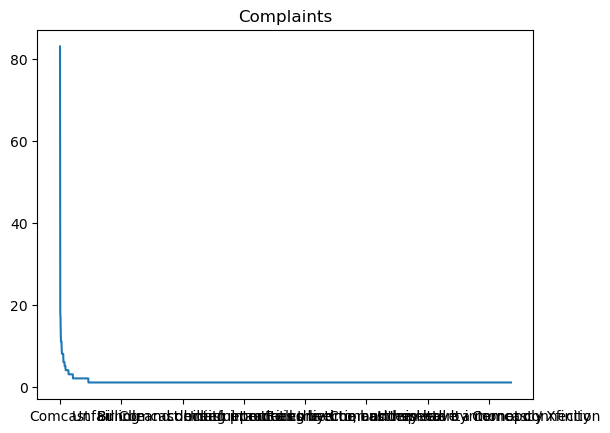

In [8]:
df["Customer Complaint"].value_counts().plot();
plt.title("Complaints")
plt.show()

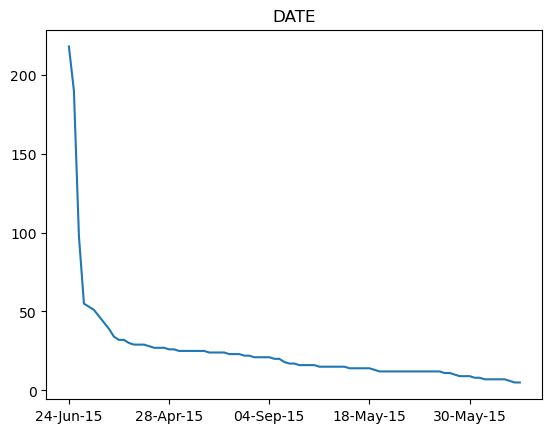

In [9]:
df["Date_month_year"].value_counts().plot();
plt.title("DATE")
plt.show()

In [10]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [11]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,04-Feb-15 9:13:18 AM,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,06-Feb-15 1:24:39 PM,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,06-Sep-15 5:28:41 PM,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23-Jun-15 11:13:30 PM,Closed


In [12]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:20]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [13]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [14]:
Status_complaints.max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [15]:
Status_complaints.min()

newStatus
Closed    1.0
Open      0.0
dtype: float64

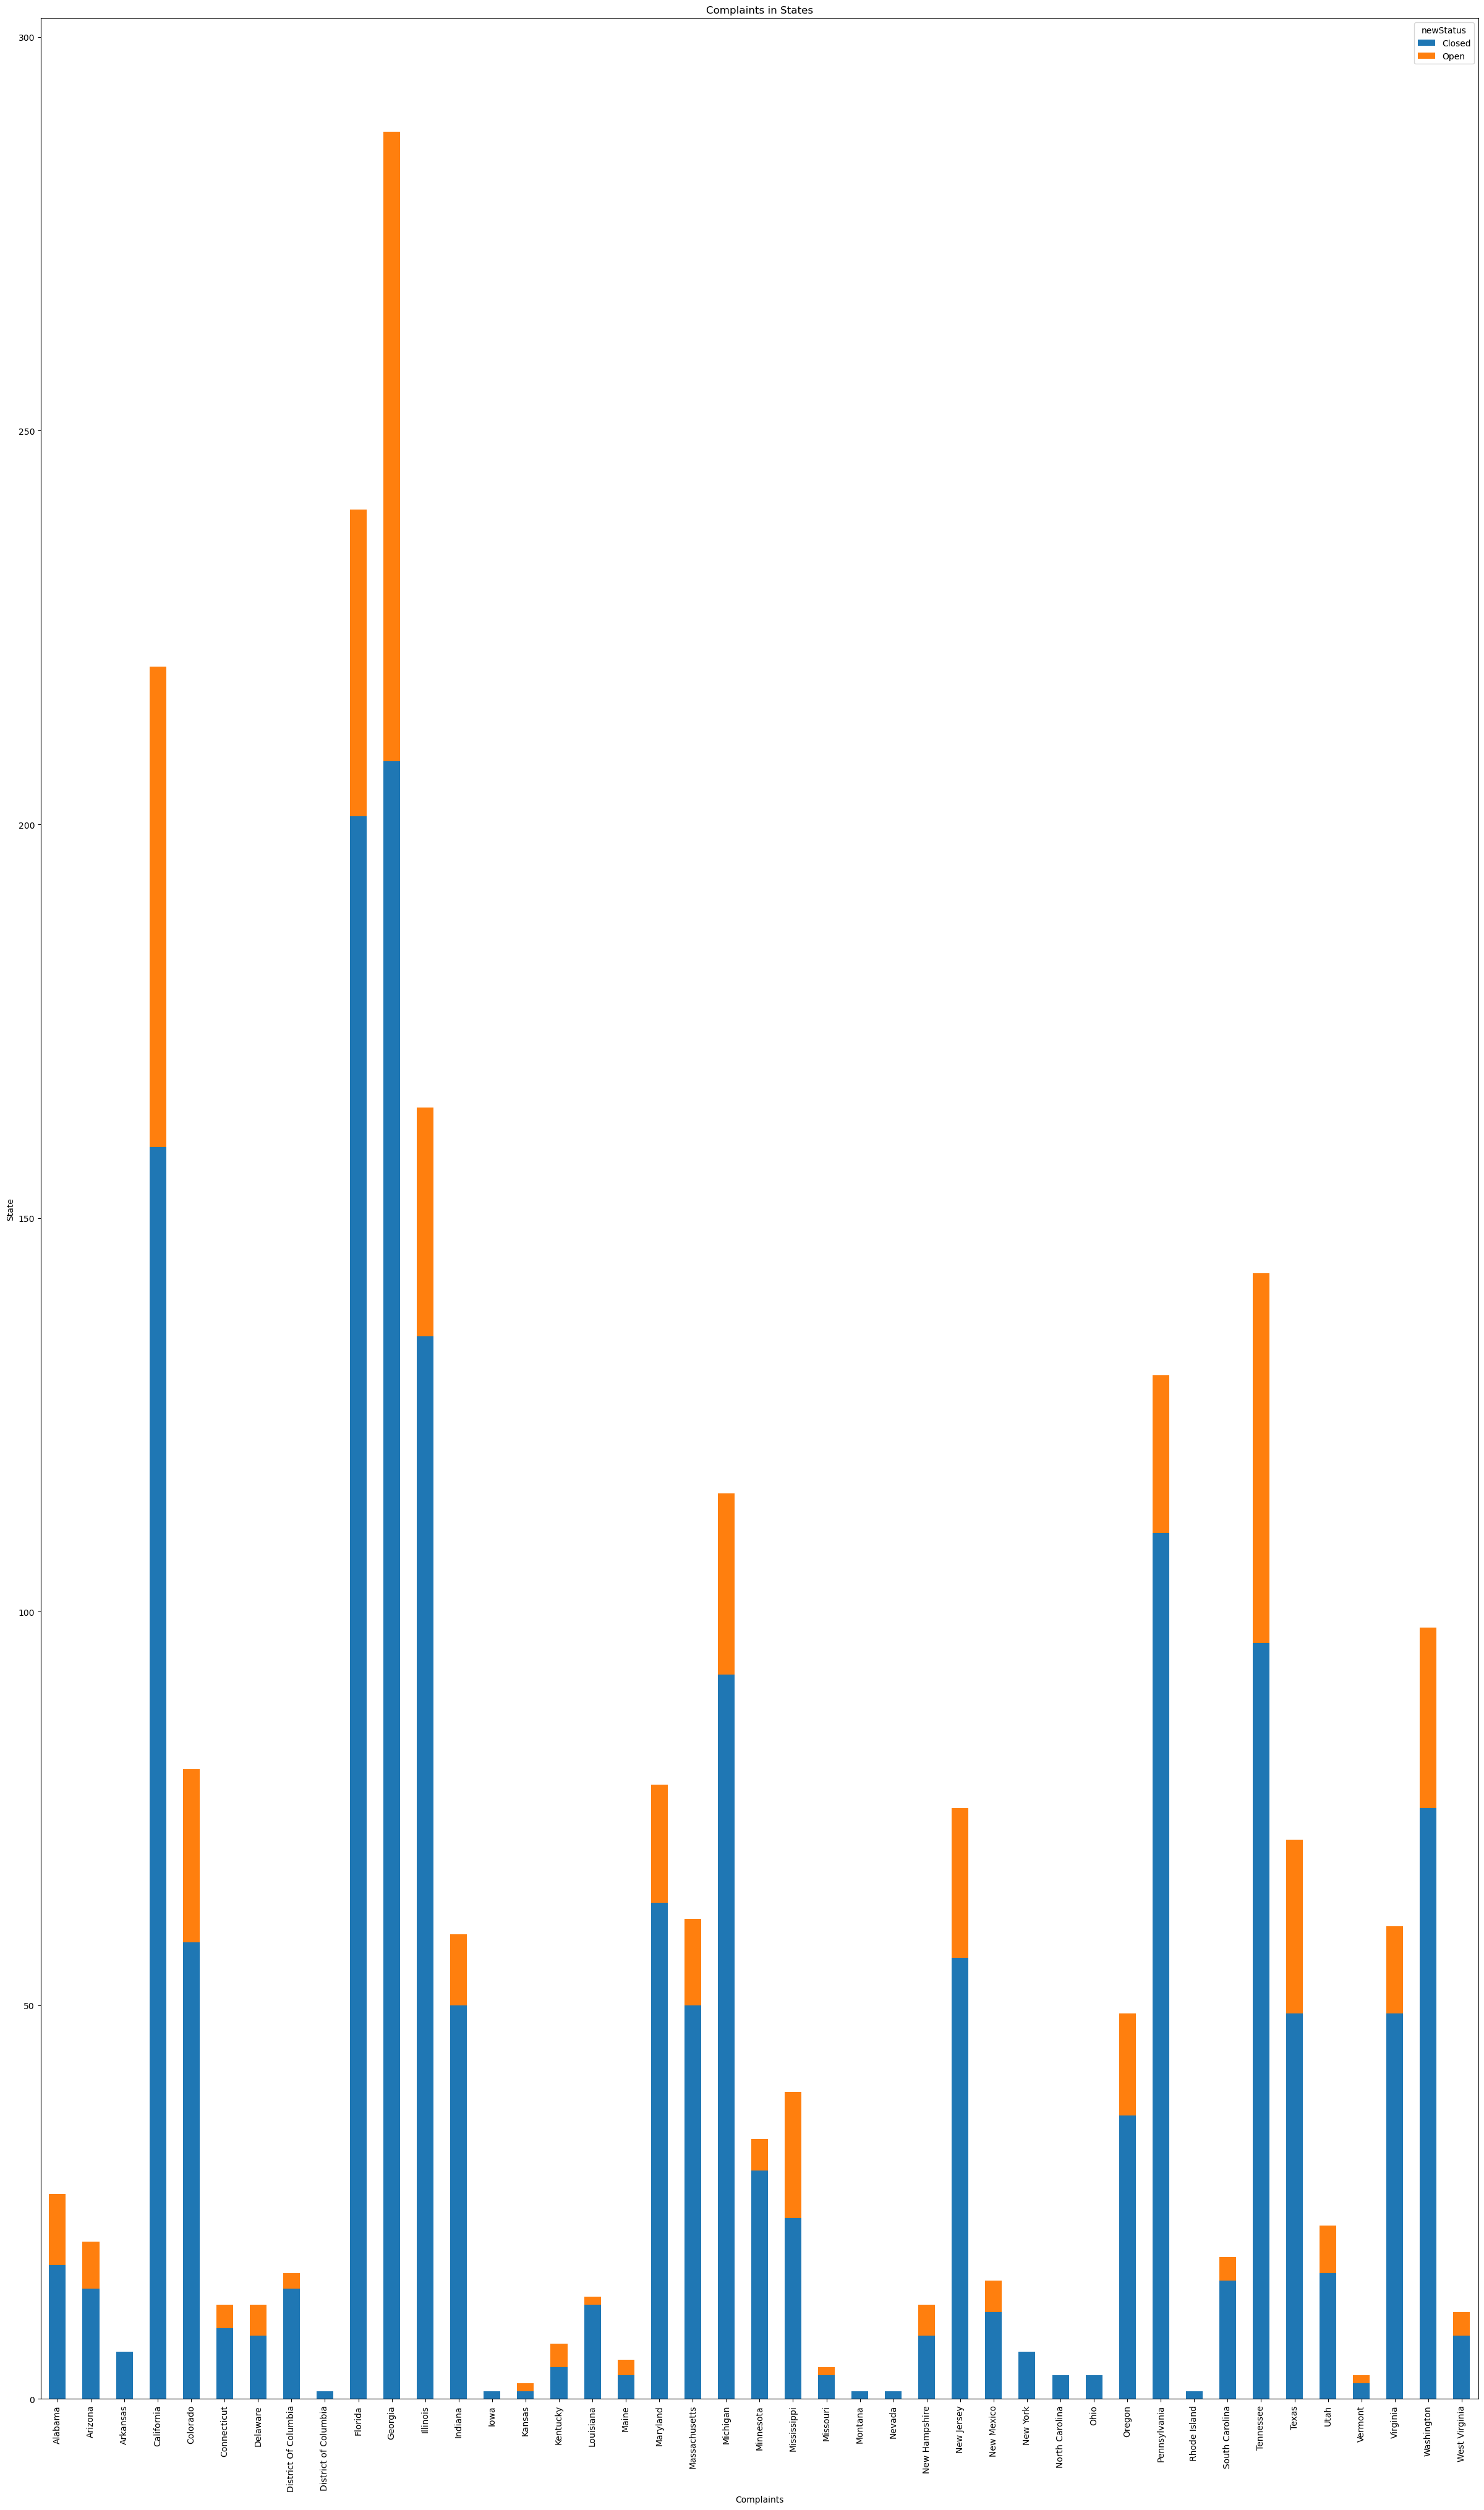

In [16]:
Status_complaints.plot(kind="bar",figsize=(30,50), stacked=True)
plt.title("Complaints in States")
plt.xlabel("Complaints")
plt.ylabel("State")
plt.show()